In [1]:
#Adam Bloodgood

# Import required libraries.
import sys           # Read system parameters.
import pandas as pd  # Manipulate and analyze data.
import sqlite3       # Manage SQL databases.
import pickle
import numpy as np                  # Work with multi-dimensional arrays.
from scipy.stats import linregress
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.
import sportypy
from sportypy.surfaces.hockey import NHLRink
import math
import requests
import json
import string

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- sqlite3 {}'.format(sqlite3.sqlite_version))

Libraries used in this project:
- Python 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
- pandas 2.2.3
- sqlite3 3.43.1


In [2]:
def getNHLSeasons(player_info):

    nhl_seasons = []
    seasons = player_info['seasonTotals']

    for i in range(0, len(seasons)):
        if seasons[i]['leagueAbbrev'] == 'NHL':
            nhl_seasons.append(seasons[i])

    return nhl_seasons

def getSpecificSeason(player_info, seasonID):

    seasons = player_info['seasonTotals']

    for i in range(0, len(seasons)):
        if seasons[i]['season'] == seasonID:
            return seasons[i]

    return 'SEASON NOT FOUND'

player_info = requests.get(f"https://api-web.nhle.com/v1/player/8480813/landing").json()
team_info = requests.get(f"https://api-web.nhle.com/v1/club-stats-season/TOR").json()


In [10]:
def getStatAverage(teams_info, stat):
    teams = len(teams_info)
    sum = 0
    for i in range(0, len(teams_info)):
        team = teams_info[i]
        sum += team[stat]
    
    return sum/teams



seasons = [20142015, 20152016, 20162017, 20172018, 20182019, 20192020, 20202021, 20212022, 20222023, 20232024]
champions = ['Chicago Blackhawks', 'Pittsburgh Penguins', 'Pittsburgh Penguins', 'Washington Capitals', 'St. Louis Blues', 'Tampa Bay Lightning', 'Tampa Bay Lightning', 'Colorado Avalanche', 'Vegas Golden Knights', 'Florida Panthers']
stats = ['faceoffWinPct', 'goalsAgainstPerGame', 'goalsForPerGame', 'penaltyKillPct', 'powerPlayPct', 'shotsAgainstPerGame', 'shotsForPerGame', 'points']

seasonAverages = {}
championStats = {}
championPercentages = {}

for season in seasons:
    teams_info = requests.get(f"https://api.nhle.com/stats/rest/en/team/summary?e&cayenneExp=seasonId={season}%20and%20gameTypeId=2").json()
    seasonAverages[season] = {}
    for stat in stats:
        seasonAverages[season][stat] = getStatAverage(teams_info['data'], stat)

for i in range(0, len(seasons)):
    teams_info = requests.get(f"https://api.nhle.com/stats/rest/en/team/summary?e&cayenneExp=seasonId={seasons[i]}%20and%20gameTypeId=2").json()
    team_data = teams_info['data']
    championStats[seasons[i]] = {'Team Name': champions[i]}
    championPercentages[seasons[i]] = {'Team Name': champions[i]}
    for j in range(0, len(team_data)):
        team = team_data[j]
        if team['teamFullName'] == champions[i]:
            for stat in stats:
                championStats[seasons[i]][stat] =  team[stat]
                championPercentages[seasons[i]][stat] = team[stat] / seasonAverages[seasons[i]][stat]



seasonAverages = pd.DataFrame.from_dict(seasonAverages, orient='index')
championStats = pd.DataFrame.from_dict(championStats, orient='index')
championPercentages = pd.DataFrame.from_dict(championPercentages, orient='index')



In [8]:
print("Season Stat Averages:")
display(seasonAverages)

print("Stats of Stanley Cup Champions:")
display(championStats)

print("Champion Ratio to Average:")
display(championPercentages)

Season Stat Averages:


,faceoffWinPct,goalsAgainstPerGame,goalsForPerGame,penaltyKillPct,powerPlayPct,shotsAgainstPerGame,shotsForPerGame,points
20142015,0.499808,2.662190,2.662190,0.813678,0.186227,29.916661,29.916661,92.200000
20152016,0.499893,2.668694,2.668695,0.813295,0.186751,29.734142,29.734141,91.166667
20162017,0.500023,2.725198,2.725198,0.808696,0.191030,30.217475,30.217474,91.633333
20172018,0.499953,2.930365,2.930365,0.797483,0.200978,31.950821,31.950821,91.548387
20182019,0.499873,2.980719,2.980720,0.802393,0.196980,31.448068,31.448068,90.741935
20192020,0.499872,2.979069,2.980681,0.799349,0.199816,31.402930,31.408396,77.870968
20202021,0.499798,2.898037,2.898036,0.801732,0.195896,29.966585,29.966585,62.290323
20212022,0.499753,3.105940,3.105941,0.793802,0.205334,31.624995,31.624996,91.000000
20222023,0.499947,3.143289,3.143289,0.786963,0.211138,31.238182,31.238181,91.437500
20232024,0.499777,3.081550,3.081549,0.790669,0.209186,30.286199,30.286199,90.468750


Stats of Stanley Cup Champions:


,Team Name,faceoffWinPct,goalsAgainstPerGame,goalsForPerGame,penaltyKillPct,powerPlayPct,shotsAgainstPerGame,shotsForPerGame,points
20142015,Chicago Blackhawks,0.520489,2.26829,2.68292,0.834124,0.176245,30.20731,33.86585,102
20152016,Pittsburgh Penguins,0.501644,2.42682,2.93902,0.844358,0.183908,29.70731,33.19512,104
20162017,Pittsburgh Penguins,0.475746,2.79268,3.39024,0.797666,0.230769,32.57317,33.47560,111
20172018,Washington Capitals,0.504086,2.90243,3.12195,0.802974,0.225409,31.86585,29.01219,105
20182019,St. Louis Blues,0.513950,2.68292,2.97560,0.814656,0.210970,28.59756,31.75609,99
20192020,Tampa Bay Lightning,0.505208,2.77142,3.47142,0.813853,0.231132,30.92857,31.08571,92
20202021,Tampa Bay Lightning,0.501119,2.58928,3.21428,0.841531,0.222222,28.26785,30.21428,75
20212022,Colorado Avalanche,0.472749,2.82926,3.75609,0.796611,0.240143,32.01219,35.04878,119
20222023,Vegas Golden Knights,0.522547,2.74390,3.25609,0.774359,0.202898,30.89024,31.54878,111
20232024,Florida Panthers,0.512679,2.41463,3.23170,0.824743,0.235074,27.79268,33.70731,110


Champion Ratio to Average:


,Team Name,faceoffWinPct,goalsAgainstPerGame,goalsForPerGame,penaltyKillPct,powerPlayPct,shotsAgainstPerGame,shotsForPerGame,points
20142015,Chicago Blackhawks,1.041377,0.852039,1.007787,1.025128,0.946398,1.009715,1.132006,1.106291
20152016,Pittsburgh Penguins,1.003503,0.909366,1.101295,1.038194,0.984775,0.999098,1.116397,1.140768
20162017,Pittsburgh Penguins,0.951449,1.024762,1.244034,0.986360,1.208026,1.077958,1.107823,1.211350
20172018,Washington Capitals,1.008267,0.990467,1.065379,1.006886,1.121563,0.997341,0.908026,1.146934
20182019,St. Louis Blues,1.028161,0.900092,0.998282,1.015283,1.071023,0.909358,1.009795,1.091006
20192020,Tampa Bay Lightning,1.010675,0.930297,1.164640,1.018145,1.156723,0.984894,0.989726,1.181442
20202021,Tampa Bay Lightning,1.002643,0.893460,1.109124,1.049642,1.134387,0.943312,1.008266,1.204039
20212022,Colorado Avalanche,0.945965,0.910919,1.209324,1.003539,1.169522,1.012243,1.108262,1.307692
20222023,Vegas Golden Knights,1.045204,0.872939,1.035886,0.983984,0.960972,0.988862,1.009943,1.213944
20232024,Florida Panthers,1.025816,0.783576,1.048726,1.043095,1.123756,0.917668,1.112959,1.215889


<module 'matplotlib.pyplot' from 'C:\\Users\\abloo\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

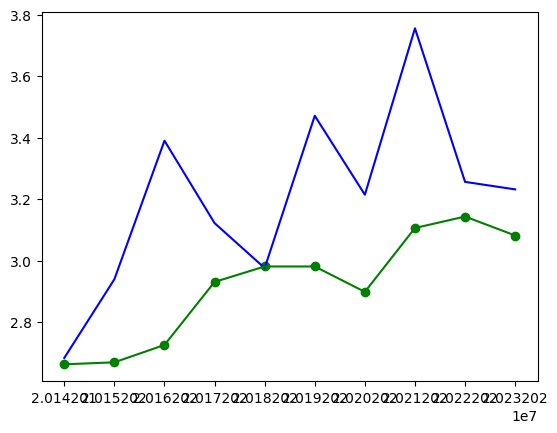

In [7]:
stat = 'goalsForPerGame'

plt.xticks(seasons)
plt.plot(seasons, championStats[stat], color = 'blue')

plt.plot(seasons, seasonAverages[stat], color = 'green')
plt.scatter(x=seasons, y=seasonAverages[stat], color = 'green')

display(plt)